# Teachers Evaluations Analysis

This notebook demonstrates how to use the Linear Regression model to predict the scores of professors based on multiple features.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, seaborn, statsmodels, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

## Load and Prepare Data

Load the professor evaluations dataset and prepare it for analysis.

In [2]:
# Set the random seed for reproducibility.
np.random.seed(42)

# Load the dataset as a DataFrame.
df = pd.read_csv("./data/evals.csv")
columns = ["age", "gender", "bty_avg", "pic_outfit", "pic_color", "score"]
colors = ["#179E86", "#2580B7", "#9EBE5B", "#C03B26", "#44546A"]

# Drop rows with missing values in the columns of interest.
df = df.dropna(subset=columns)

## Initial Scatter Plot

Create a simple scatter plot to explore the relationship between beauty average and score.

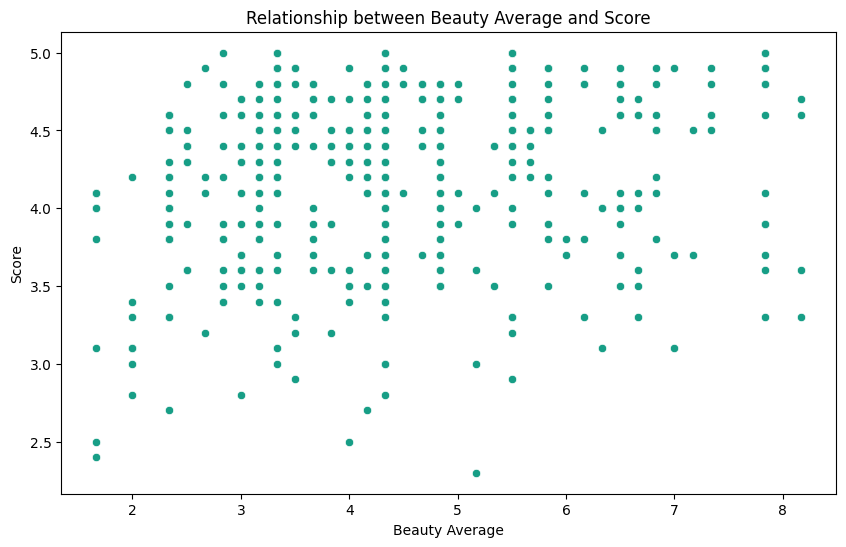

In [3]:
# Create a scatter plot to show the relationship between bty_avg and score.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=columns[2], y=columns[-1], color=colors[0])
plt.title("Relationship between Beauty Average and Score")
plt.xlabel("Beauty Average")
plt.ylabel("Score")
plt.show()

## Scatter Plot with Size Mapping

Modify circle size to show data overlapping patterns.

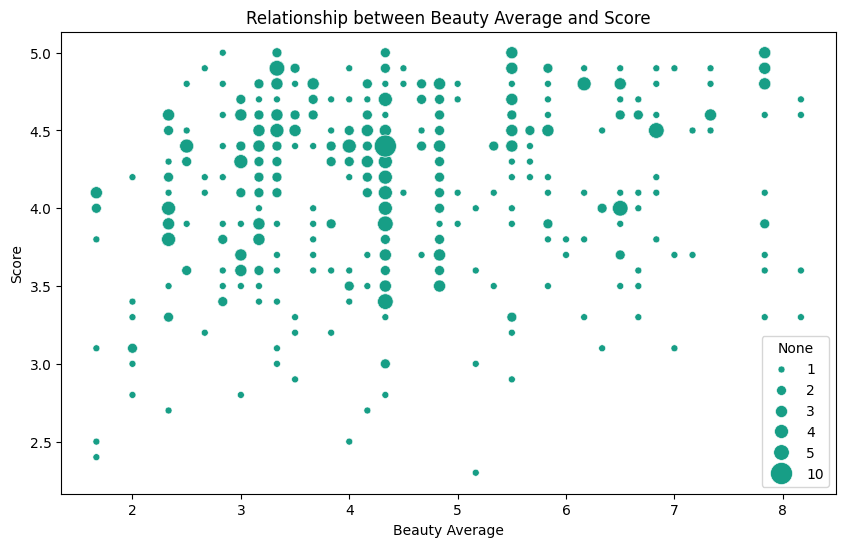

In [4]:
# Create a scatter plot to show the relationship between bty_avg and score and
# modifying the circle size to show data overlapping.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x=columns[2], y=columns[-1], color=colors[0],
    size=df.groupby([columns[2], columns[-1]]).transform("size"),
    sizes=(25, 250)
)
plt.title("Relationship between Beauty Average and Score")
plt.xlabel("Beauty Average")
plt.ylabel("Score")
plt.show()

## Scatter Plot with Jitter

Apply jitter to reduce overplotting and better visualize data distribution.

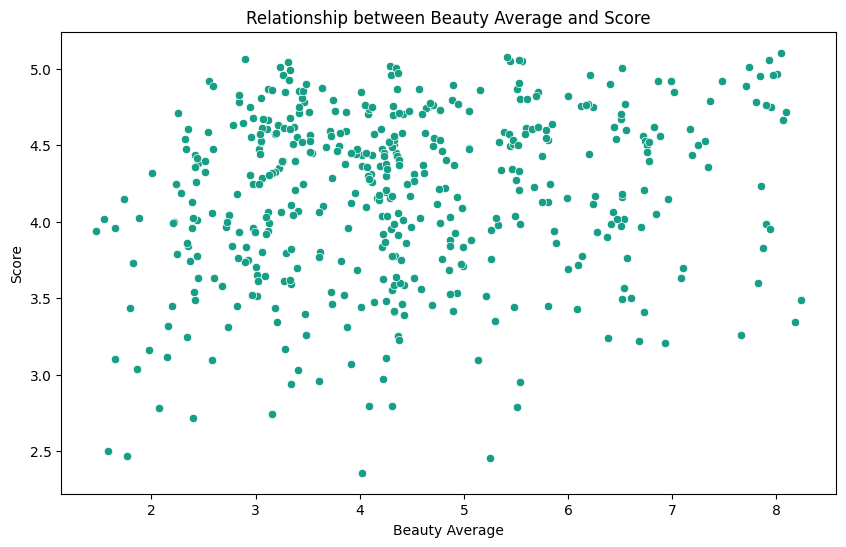

In [5]:
# Create a scatter plot to show the relationship between bty_avg and score with
# jitter applied.
JITTER_STRENGTH = 0.1
x_jitter = df[columns[2]] + np.random.normal(
    0, JITTER_STRENGTH, size=len(df))
y_jitter = df[columns[-1]] + np.random.normal(
    0, JITTER_STRENGTH, size=len(df))

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=x_jitter, y=y_jitter, color=colors[0]
)
plt.title("Relationship between Beauty Average and Score")
plt.xlabel("Beauty Average")
plt.ylabel("Score")
plt.show()

## Simple Linear Regression

Apply simple linear regression to model the relationship between beauty average and score.

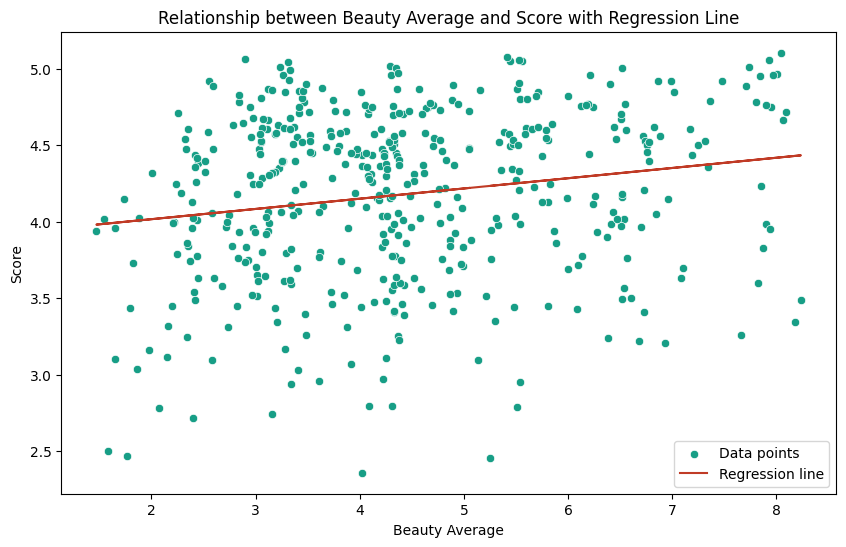

In [6]:
# Apply a simple linear regression.
X = x_jitter.values.reshape(-1, 1)
y = y_jitter.values

# Create and fit the model.
model = LinearRegression()
model.fit(X, y)

# Predict the scores.
y_pred = model.predict(X)

# Plot the data points.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=x_jitter, y=y_jitter, color=colors[0], label="Data points"
)

# Plot the regression line.
plt.plot(X, y_pred, color=colors[3], label="Regression line")

plt.title("Relationship between Beauty Average and Score with Regression Line")
plt.xlabel("Beauty Average")
plt.ylabel("Score")
plt.legend()
plt.show()

## Simple Regression Metrics

Calculate and display key metrics for the simple linear regression model.

In [7]:
# Print the linear equation.
intercept = model.intercept_
slope = model.coef_[0]
print(f"\nThe linear equation is: y = {slope:.4f}x + {intercept:.4f}.")

# Calculate the Total Sum of Squares (TSS).
tss = ((y - y.mean()) ** 2).sum()
print(f"The Total Sum of Squares (TSS) is: {tss:.4f}.")

# Calculate the Sum of Squared Errors (SSE).
sse = ((y - y_pred) ** 2).sum()
print(f"The Sum of Squared Errors (SSE) is: {sse:.4f}.")

# Calculate the Coefficient of Determination (R^2).
r_squared = (tss - sse) / tss
print(f"The Coefficient of Determination (R^2) is: {r_squared:.4f}.")


The linear equation is: y = 0.0669x + 3.8829.
The Total Sum of Squares (TSS) is: 140.8302.
The Sum of Squared Errors (SSE) is: 135.9851.
The Coefficient of Determination (R^2) is: 0.0344.


## Multiple Regression: Beauty and Age

Apply multiple linear regression with beauty average and age as predictors.

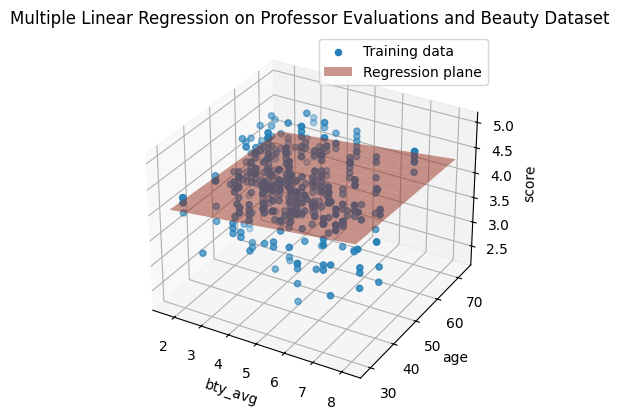

In [8]:
# Apply a multiple linear regression with bty_avg and age.
X_multi = df[[columns[2], columns[0]]]
y_multi = df[columns[-1]]

# Create and fit the model.
model = LinearRegression()
model.fit(X_multi, y_multi)

# Predict the scores.
y_pred_multi = model.predict(X_multi)

# Plot the regression plane and residuals.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X_train = [X_multi[columns[2]].values, X_multi[columns[0]].values]
y_train = y_multi.values

# Scatter plot of the actual data points.
ax.scatter(
    X_train[0], X_train[1], y_train,
    color="#2580B7", label="Training data"
)

# Create a meshgrid for the regression plane.
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train[0].min(), X_train[0].max(), 10),
    np.linspace(X_train[1].min(), X_train[1].max(), 10)
)
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

# Plot the regression plane.
ax.plot_surface(
    x_surf, y_surf, z_surf,
    color="#C03B26", alpha=0.5, label="Regression plane"
)

ax.set_xlabel(columns[2])
ax.set_ylabel(columns[0])
ax.set_zlabel(columns[-1])
plt.title(
    "Multiple Linear Regression on Professor Evaluations and Beauty Dataset")
plt.legend()
plt.show()

## Multiple Regression Metrics: Beauty and Age

Calculate metrics for the beauty and age regression model.

In [9]:
# Print the linear equation.
intercept = model.intercept_
slope = model.coef_
print("\nThe linear equation is: y = "
      f"{slope[0]:.4f}x1 + {slope[1]:.4f}x2 + {intercept:.4f}."
)

# Calculate the Total Sum of Squares (TSS).
tss_multi = ((y_multi - y_multi.mean()) ** 2).sum()
print(f"The Total Sum of Squares (TSS) is: {tss_multi:.4f}.")

# Calculate the Sum of Squared Errors (SSE).
sse_multi = ((y_multi - y_pred_multi) ** 2).sum()
print(f"The Sum of Squared Errors (SSE) is: {sse_multi:.4f}.")

# Calculate the Coefficient of Determination (R^2).
r_squared_multi = (tss_multi - sse_multi) / tss_multi
print(f"The Coefficient of Determination (R^2) is: {r_squared_multi:.4f}.")


The linear equation is: y = 0.0607x1 + -0.0031x2 + 4.0547.
The Total Sum of Squares (TSS) is: 136.6543.
The Sum of Squared Errors (SSE) is: 131.4914.
The Coefficient of Determination (R^2) is: 0.0378.


## Multiple Regression: Beauty and Gender

Apply multiple linear regression with beauty average and gender as predictors.

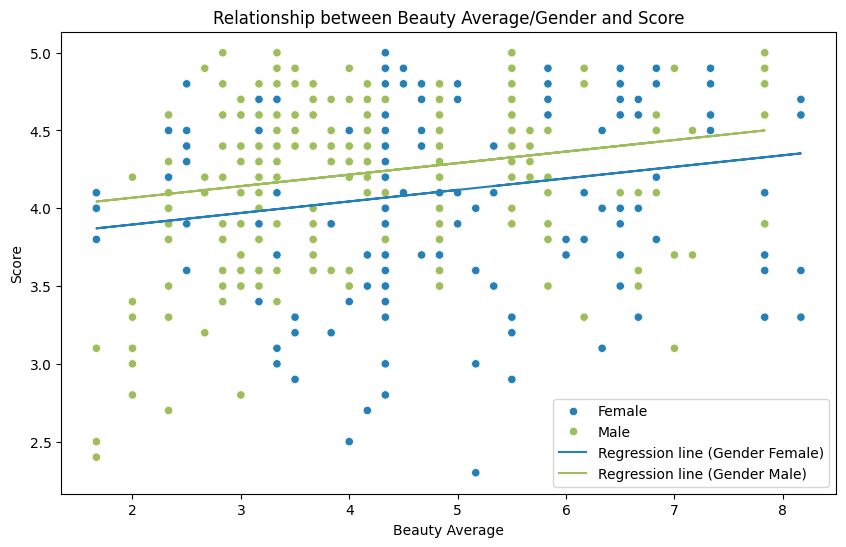

In [10]:
# Apply a multiple linear regression with bty_avg and gender.
X_multi = df[[columns[2], columns[1]]]
y_multi = df[columns[-1]]

label_encoder = LabelEncoder()
X_multi = X_multi.copy()
X_multi[columns[1]] = label_encoder.fit_transform(X_multi[columns[1]])

# Create and fit the model.
model = LinearRegression()
model.fit(X_multi, y_multi)

# Predict the scores.
y_pred_multi = model.predict(X_multi)

# Plot the data points with hue based on gender.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_multi[columns[2]], y=y_multi,
    hue=X_multi[columns[1]].map({0: "Female", 1: "Male"}),
    palette=colors[1:3], legend="full"
)

# Plot the regression lines for each gender.
genders = ["Female", "Male"]
for gender in X_multi[columns[1]].unique():
    mask = X_multi[columns[1]] == gender
    X_gender = X_multi[mask]
    y_pred_gender = model.predict(X_gender)
    plt.plot(
        X_gender[columns[2]], y_pred_gender, color=colors[1:3][gender],
        label=f"Regression line (Gender {genders[gender]})"
    )

plt.legend()
plt.title("Relationship between Beauty Average/Gender and Score")
plt.xlabel("Beauty Average")
plt.ylabel("Score")
plt.show()

## Multiple Regression Metrics: Beauty and Gender

Calculate metrics for the beauty and gender regression model.

In [11]:
# Print the linear equation.
intercept = model.intercept_
slope = model.coef_
print("\nThe linear equation is: y = "
      f"{slope[0]:.4f}x1 + {slope[1]:.4f}x2 + {intercept:.4f}."
)

# Calculate the Total Sum of Squares (TSS).
tss_multi = ((y_multi - y_multi.mean()) ** 2).sum()
print(f"The Total Sum of Squares (TSS) is: {tss_multi:.4f}.")

# Calculate the Sum of Squared Errors (SSE).
sse_multi = ((y_multi - y_pred_multi) ** 2).sum()
print(f"The Sum of Squared Errors (SSE) is: {sse_multi:.4f}.")

# Calculate the Coefficient of Determination (R^2).
r_squared_multi = (tss_multi - sse_multi) / tss_multi
print(f"The Coefficient of Determination (R^2) is: {r_squared_multi:.4f}.")


The linear equation is: y = 0.0742x1 + 0.1724x2 + 3.7473.
The Total Sum of Squares (TSS) is: 136.6543.
The Sum of Squared Errors (SSE) is: 128.5750.
The Coefficient of Determination (R^2) is: 0.0591.


## Full Multiple Regression Model

Apply multiple linear regression with all available features and calculate confidence intervals.

In [12]:
# Apply a multiple linear regression with age, gender, bty_avg, pic_outfit, and pic_color.
X_multi = df[columns[:-1]]
y_multi = df[columns[-1]]

# Encode categorical variables.
label_encoder = LabelEncoder()
X_multi = X_multi.copy()
X_multi["gender"] = label_encoder.fit_transform(X_multi["gender"])
X_multi["pic_outfit"] = label_encoder.fit_transform(X_multi["pic_outfit"])
X_multi["pic_color"] = label_encoder.fit_transform(X_multi["pic_color"])

# Create and fit the model.
model = LinearRegression()
model.fit(X_multi, y_multi)

# Predict the scores.
y_pred_multi = model.predict(X_multi)

# Print the linear equation.
intercept = model.intercept_
slope = model.coef_

# Add a constant to the model (intercept).
X_multi = sm.add_constant(X_multi)

# Fit the model using statsmodels.
model_sm = sm.OLS(y_multi, X_multi).fit()

# Get the confidence intervals for each coefficient.
conf_intervals = model_sm.conf_int()
print("\nConfidence intervals for each coefficient:")
print(conf_intervals)


Confidence intervals for each coefficient:
                   0         1
const       3.955266  4.784984
age        -0.012582 -0.001666
gender      0.121184  0.325514
bty_avg     0.012570  0.082074
pic_outfit -0.148340  0.118031
pic_color  -0.348118 -0.076526


## Visualize Coefficients and Confidence Intervals

Plot the regression coefficients with their confidence intervals.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_96862/172931065.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_coefficients = coefficients[sorted_indices]


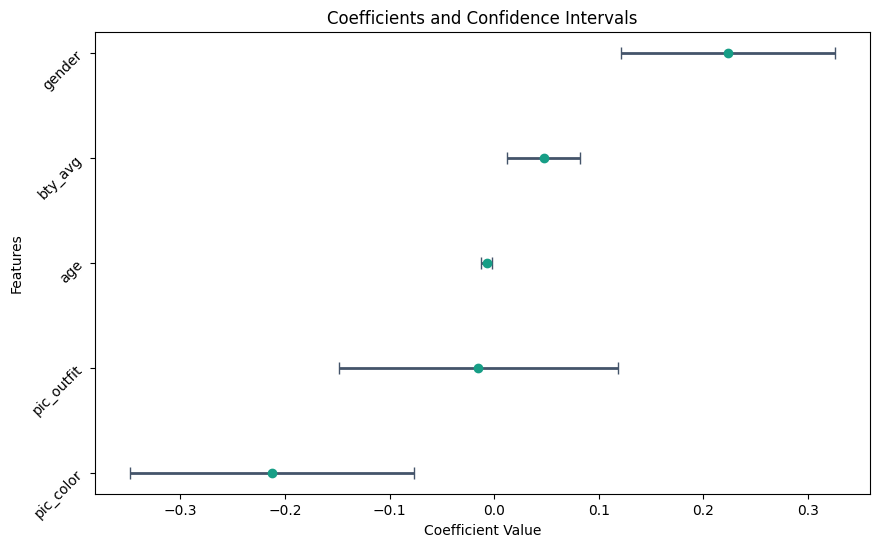

In [13]:
# Plot the coefficients as dots and the confidence interval as a range.
plt.figure(figsize=(10, 6))
coefficients = model_sm.params[1:]  # Exclude the intercept
conf_intervals = conf_intervals[1:]  # Exclude the intercept

# Sort coefficients and confidence intervals by the smallest coefficient values
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_conf_intervals = conf_intervals.iloc[sorted_indices]

# Plot the coefficients.
plt.errorbar(
    y=range(len(sorted_coefficients)), x=sorted_coefficients,
    xerr=[ sorted_coefficients - sorted_conf_intervals[0],
           sorted_conf_intervals[1] - sorted_coefficients ],
    fmt="o", color=colors[0], ecolor=colors[-1], elinewidth=2, capsize=4
)
plt.yticks(
    range(len(sorted_coefficients)),
    X_multi.columns[1:][sorted_indices], rotation=45
)

plt.yticks(
    range(len(coefficients)), X_multi.columns[1:][sorted_indices], rotation=45
)
plt.title("Coefficients and Confidence Intervals")
plt.ylabel("Features")
plt.xlabel("Coefficient Value")
plt.show()

## Full Model Metrics

Calculate and display metrics for the complete multiple regression model.

In [14]:
# Print the linear equation.
print("\nThe linear equation is: y = "
    f"{slope[0]:.4f}*age + {slope[1]:.4f}*gender + {slope[2]:.4f}*bty_avg + "
    f"{slope[3]:.4f}*pic_outfit + {slope[4]:.4f}*pic_color + {intercept:.4f}."
)

# Calculate the Total Sum of Squares (TSS).
tss_multi = ((y_multi - y_multi.mean()) ** 2).sum()
print(f"The Total Sum of Squares (TSS) is: {tss_multi:.4f}.")

# Calculate the Sum of Squared Errors (SSE).
sse_multi = ((y_multi - y_pred_multi) ** 2).sum()
print(f"The Sum of Squared Errors (SSE) is: {sse_multi:.4f}.")

# Calculate the Coefficient of Determination (R^2).
r_squared_multi = (tss_multi - sse_multi) / tss_multi
print(f"The Coefficient of Determination (R^2) is: {r_squared_multi:.4f}.")


The linear equation is: y = -0.0071*age + 0.2233*gender + 0.0473*bty_avg + -0.0152*pic_outfit + -0.2123*pic_color + 4.3701.
The Total Sum of Squares (TSS) is: 136.6543.
The Sum of Squared Errors (SSE) is: 124.6627.
The Coefficient of Determination (R^2) is: 0.0878.
